In [ ]:
# Article selected: Pancreatic Cancer: A Review (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9363152/)
# Download the article to the ./documents folder.
# ./documents/nihms-1828057.pdf

In [1]:
question = "What percentage of patients have pathogenic germline gene variants?"

In [6]:
# pip install langchain_community
# pip install pypdf

from langchain_community.document_loaders import PyPDFLoader

In [7]:
loader = PyPDFLoader("./documents/nihms-1828057.pdf")

In [8]:
pages = loader.load_and_split()

In [9]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)

In [10]:
documents = text_splitter.split_documents(pages)

In [ ]:
print(f"{len(pages)} vc {len(documents)}")

In [13]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

In [14]:
# pip install faiss-cpu
from langchain_community.vectorstores import FAISS

In [16]:
vector = FAISS.from_documents(documents, embeddings)

In [ ]:
vector.similarity_search_with_score(question)

# [(Document(metadata={'source': './documents/nihms-1828057.pdf', 'page': 3}, page_content='to increasing rates of obesity and diabetes, which are potentially modifiable risk factors for \nPDAC.\nAbout 3.8% to 9.7% of patients with PDAC have pathogenic germline gene variants \nthat increase susceptibility to PDAC. These variants occur mostly in DNA damage repair \ngenes.25–27 The most common variants in PDAC include BRCA2 , BRCA1  (hereditary breast \nand ovary cancer syndrome), and ATM  (ataxia telangiectasia syndrome). Germline BRCA2 \nvariants are associated with an increased risk for PDAC (OR, 9.07 [95% CI, 6.33–12.98]) \nmore commonly than BRCA1  (OR, 2.95 [95% CI, 1.49–5.60]) or ATM  variants (OR, \n8.96 [95% CI, 6.12–12.98]).28 Uncommon (1% of patients with PDAC) but therapeutically \nimportant inheritable germline variants also occur in PDAC in mismatch repair deficiency \ngenes MLH1 , MSH2 , MSH6 , and PMS2  as part of Lynch syndrome.29 In 2019, the National \nComprehensive Cancer Network guidelines recommended that all patients newly diagnosed'),
#   0.2893287),
#  (Document(metadata={'source': './documents/nihms-1828057.pdf', 'page': 17}, page_content='Hereditary breast and ovary cancer syndrome ( BRCA1/2 , PALB2 ; 5%–9%)\nAtaxia-telangiectasia ( ATM ; approximately 3%–4%)\nFamilial atypical multiple mole and melanoma syndrome ( CDKN2A , p16; <1%)\nLynch syndrome ( MLH1 , MSH2 , MSH6 , PMS2 , EPCAM ; <1%)\nHereditary pancreatitis ( PRSS1 , SPINK1 ; <1%)\nPeutz-Jeghers syndrome ( STK11 ; <1%)\nAbbreviation: AJCC, American Joint Committee on Cancer.\naPercentages indicate the frequency per 100 unselected patients diagnosed with pancreas cancer.Park et al. Page 18\nJAMA . Author manuscript; available in PMC 2022 August 09.\nAuthor Manuscript Author Manuscript Author Manuscript Author Manuscript'),
#   0.31989175),
#  (Document(metadata={'source': './documents/nihms-1828057.pdf', 'page': 1}, page_content='7% of patients with a BRCA  pathogenic germline variant and metastatic PDAC, olaparib, a \npoly (adenosine diphosphate [ADB]-ribose) polymerase inhibitor, is a maintenance option that \nimproves progression-free survival following initial platinum-based therapy.\nCONCLUSIONS AND RELEVANCE— Approximately 60 000 new cases of PDAC are \ndiagnosed per year, and approximately 50% of patients have advanced disease at diagnosis. The \nincidence of PDAC is increasing. Currently available cytotoxic therapies for advanced disease \nare modestly effective. For all patients, multidisciplinary management, comprehensive germline \ntesting, and integrated supportive care are recommended.\nApproximately 60 430 new diagnoses of pancreatic cancer are anticipated in the US in \n2021.1 The incidence is rising at a rate of 0.5% to 1.0% per year, and pancreatic cancer \nis projected to become the second-leading cause of cancer death by 2030 in the US.1,2'),
#   0.3317449),
#  (Document(metadata={'source': './documents/nihms-1828057.pdf', 'page': 12}, page_content='Syndrome and Cancer Project. Cancer Epidemiol Biomarkers Prev. 2010;19(9):2307–2317. \ndoi:10.1158/1055-9965.EPI-10-0234 [PubMed: 20826833] \n24. Sung H, Siegel RL, Rosenberg PS, Jemal A. Emerging cancer trends among young adults in the \nUSA: analysis of a population-based cancer registry. Lancet Public Health. 2019;4(3):e137–e147. \ndoi:10.1016/S2468-2667(18)30267-6 [PubMed: 30733056] \n25. Shindo K, Yu J, Suenaga M, et al. Deleterious germline mutations in patients with apparently \nsporadic pancreatic adenocarcinoma. J Clin Oncol. 2017;35(30):3382–3390. doi:10.1200/\nJCO.2017.72.3502 [PubMed: 28767289] \n26. Hu C, Hart SN, Polley EC, et al. Association between inherited germline mutations in cancer \npredisposition genes and risk of pancreatic cancer. JAMA. 2018;319(23):2401–2409. doi:10.1001/\njama.2018.6228 [PubMed: 29922827] \n27. Golan T, Kindler HL, Park JO, et al. Geographic and ethnic heterogeneity of germline BRCA1  or'),
#   0.34655964)]

In [20]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template(
"""
Answer the following question based on the provided context.

If the context did not answer the question, do the following:
    1. Mention that you could not find exact answer;
    2. Provide a summary of the context.

Context:
{context}

Question:
{question}

Your response:

"""
)

In [21]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()

In [22]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

In [23]:
retriever = vector.as_retriever()

In [25]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough

setup_and_retrieval = RunnableParallel(
    {"context": retriever, "question": RunnablePassthrough()}
)

In [26]:
chain = setup_and_retrieval | prompt | llm | output_parser

In [27]:
response = chain.invoke(question)

In [ ]:
print(f"Question:\n{question}\n\nAnswer:\n{response}")

# Question:
# What percentage of patients have pathogenic germline gene variants?
#
# Answer:
# Based on the provided context, it is mentioned that about 3.8% to 9.7% of patients with PDAC have pathogenic germline gene variants. 
# 
# Therefore, the percentage of patients with pathogenic germline gene variants ranges from 3.8% to 9.7%.

In [29]:
# We now can open the pdf and verify if the answer is there.
!open ./documents/nihms-1828057.pdf

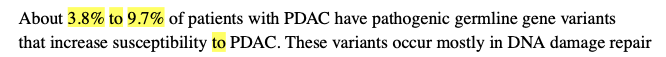